### Classification with MNIST dataset using MLP

In [35]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader , Dataset
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torchvision.datasets import MNIST
from torchvision import transforms
import torchvision
from tqdm.notebook import tqdm , trange


In [36]:

train = MNIST(root='data/', train=True, download=True , transform=transforms.ToTensor())
test = MNIST(root='data/', train=False, download=True , transform=transforms.ToTensor())

train_loader = DataLoader(train , batch_size=256 , shuffle=True , num_workers=5)
test_loader = DataLoader(test , batch_size=256 , shuffle=False , num_workers=5)


In [37]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [38]:
# Let's get a batch of data
image , label = next(iter(train_loader))
print(image.shape , label.shape)

torch.Size([256, 1, 28, 28]) torch.Size([256])


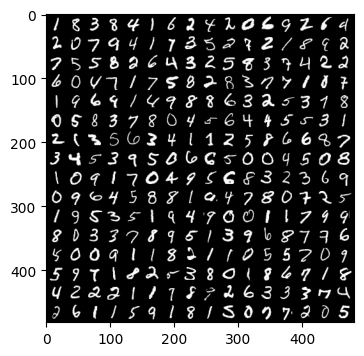

In [39]:
plt.figure(figsize=(12,4))
out = torchvision.utils.make_grid(image , nrow=16)
plt.imshow(np.transpose(out.numpy() , (1,2,0)))
plt.show()

In [40]:
# Create a Simple MLP neural network

class SimpleMLP(nn.Module):
    def __init__(self, out_size=10):
        super().__init__()
        self.linear1 = nn.Linear(28*28 , 512)
        self.linear2 = nn.Linear(512 , 256)
        self.linear3 = nn.Linear(256 , 128)
        self.linear4 = nn.Linear(128 , out_size)
        self.relu = nn.ReLU()

    def forward(self , x ):
        x = x.reshape(x.shape[0] , -1)
        x = self.relu(self.linear1(x))
        x = self.relu(self.linear2(x))
        x = self.relu(self.linear3(x))
        x = self.linear4(x)
        return x

In [41]:
model = SimpleMLP().to(device=device)
criterion = nn.CrossEntropyLoss()
learning_rate = 1e-3
optimizer = optim.Adam(model.parameters() , lr=learning_rate)
epochs = 10
print(model)

SimpleMLP(
  (linear1): Linear(in_features=784, out_features=512, bias=True)
  (linear2): Linear(in_features=512, out_features=256, bias=True)
  (linear3): Linear(in_features=256, out_features=128, bias=True)
  (linear4): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU()
)


In [42]:
def train_model(model , train_loader , criterion , optimizer , device , loss_logger):
    
    for i , (data , label) in enumerate(tqdm(train_loader , desc="Training" , leave=False)):
        data , label = data.to(device) , label.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output , label)
        loss.backward()
        optimizer.step()
        loss_logger.append(loss.item())

    return model , loss_logger 

In [43]:
def test_model(model , test_loader , criterion , device , loss_logger):
    
    with torch.no_grad():
        correct_predictions = 0
        total_predictions = 0
        for batch_idx, (data, target) in enumerate(tqdm(test_loader, desc="Testing", leave=False)):
            data , target = data.to(device) , target.to(device)
            outputs = model(data)
            # Calculate the accuracy of the model
            # you'll need to accumulate the accuracy over multiple steps
            
            _, predicted = torch.max(outputs, 1)
            correct_predictions += (predicted == target).sum().item()
            total_predictions += target.shape[0]

            # Calculate the loss
            loss = criterion(outputs, target)
            loss_logger.append(loss.item())
            
        acc = (correct_predictions/total_predictions) * 100.0
        return loss_logger, acc

In [44]:
train_loss = []
test_loss = []
test_accuracy = []


for epochs in trange(epochs , desc="Epochs" , leave=True):
    model , train_loss = train_model(model , train_loader , criterion , optimizer , device , train_loss)
    test_loss , acc = test_model(model , test_loader , criterion , device , test_loss)
    test_accuracy.append(acc)
    print(f"Epoch {epochs+1} : Test Accuracy : {acc:.2f}%")

Epochs:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/235 [00:00<?, ?it/s]

Testing:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 1 : Test Accuracy : 95.22%


Training:   0%|          | 0/235 [00:00<?, ?it/s]

Testing:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 2 : Test Accuracy : 96.68%


Training:   0%|          | 0/235 [00:00<?, ?it/s]

Testing:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 3 : Test Accuracy : 96.85%


Training:   0%|          | 0/235 [00:00<?, ?it/s]

Testing:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 4 : Test Accuracy : 97.56%


Training:   0%|          | 0/235 [00:00<?, ?it/s]

Testing:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 5 : Test Accuracy : 97.85%


Training:   0%|          | 0/235 [00:00<?, ?it/s]

Testing:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 6 : Test Accuracy : 97.90%


Training:   0%|          | 0/235 [00:00<?, ?it/s]

Testing:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 7 : Test Accuracy : 97.75%


Training:   0%|          | 0/235 [00:00<?, ?it/s]

Testing:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 8 : Test Accuracy : 98.04%


Training:   0%|          | 0/235 [00:00<?, ?it/s]

Testing:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 9 : Test Accuracy : 97.88%


Training:   0%|          | 0/235 [00:00<?, ?it/s]

Testing:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 10 : Test Accuracy : 97.85%


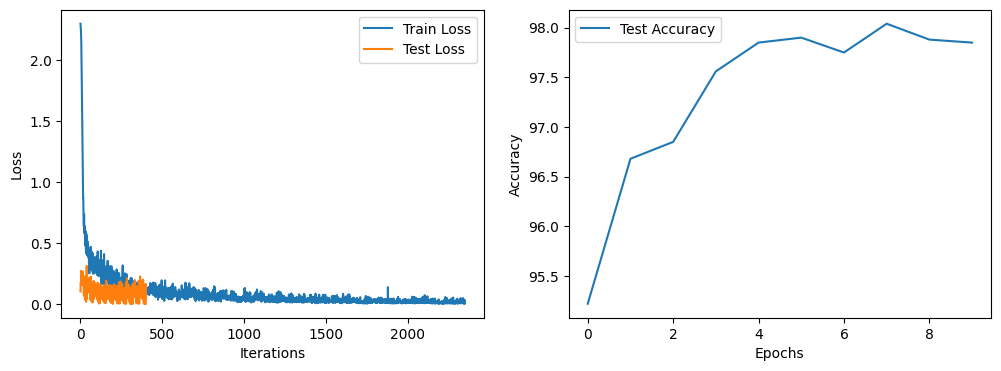

In [45]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(train_loss , label='Train Loss')
plt.plot(test_loss , label='Test Loss')
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.subplot(1,2,2)
plt.plot(test_accuracy , label='Test Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()